###  Guide To Feature Engineering in Python

*We are here to learn the underlying techniques and tools for doing feature Engineering and Extraction in Python*

__By Dilnaz N__

Feature Engineering is one of the most important skill needed in data science and Machine learning, because it nfluences the performance of a machine learning and derive the quality insights during Exploratory Data Analytics.

#### What we are going to learn in this guide:

    1. What is feature engineering?
    2. How to handle missing values
    3. How to handle categorical values?
    4. How to handle numerical/ continuous features?
    5. Encoding, One-hot Encoding
    6. Scaling and Normalization of the features
    7. Working with date and time
    8. Working with latitude and longitude
    

#### What is Feature Engineering?

Feature Engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is the act of extracting important features from raw data and transforming them into a format that is suitable for machine learning.

It requires domain knowledge, statistics, maths and programming knowledge. 

#### Importing Libraries and Datasets

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

We import pandas, numpy, seaborn, matplot for basic data manipulation and visulaization, we silence unnecessary warnings

In [5]:
os.chdir('c:\\Python Practice\Feature Engineering')

In [6]:
pwd

'c:\\Python Practice\\Feature Engineering'

In [41]:
loan_demo = pd.read_csv('loan_demographics.csv')
loan_perf = pd.read_csv('loan_perf.csv')
logistics_data = pd.read_csv('logistics_data.csv')
prev_loans = pd.read_csv('prev_loans.csv')

We import the four different datatsets for demonstrating feature engineering

__Prev_loans.csv__

In [8]:
prev_loans.sample(3).T

,745,14683,9242
Unnamed: 0,745,14683,9242
customerid,8a858fbb54ccb33c0154ce053f285f12,8a858fde580afd48015818eda53830c8,8a858ee454da1cbd0154dce7be67210f
systemloanid,301646087,301865288,301773855
loannumber,3,7,5
approveddate,2016-07-07 12:43:32.000000,2017-04-12 02:33:53.000000,2016-12-14 17:28:51.000000
creationdate,2016-07-07 11:43:20.000000,2017-04-12 01:33:46.000000,2016-12-14 16:28:42.000000
loanamount,10000.0,20000.0,10000.0
totaldue,13000.0,23800.0,11450.0
termdays,30,30,15
closeddate,2016-08-02 11:19:41.000000,2017-05-11 12:12:15.000000,2016-12-21 15:06:19.000000


In [17]:
prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       18183 non-null  int64  
 1   customerid       18183 non-null  object 
 2   systemloanid     18183 non-null  int64  
 3   loannumber       18183 non-null  int64  
 4   approveddate     18183 non-null  object 
 5   creationdate     18183 non-null  object 
 6   loanamount       18178 non-null  float64
 7   totaldue         18183 non-null  float64
 8   termdays         18183 non-null  int64  
 9   closeddate       18183 non-null  object 
 10  referredby       1026 non-null   object 
 11  firstduedate     18183 non-null  object 
 12  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


__loan_demo.csv__

In [9]:
loan_demo.sample(3).T

,3268,171,2137
customerid,8a8588bf54c8eab60154c9226d7917e7,8a858e285aa8cfc1015aa8fd90951f5a,8a858899538ddb8e0153a780c56e34bb
birthdate,1988-09-19 00:00:00.000000,1977-06-29 00:00:00.000000,1978-03-14 00:00:00.000000
bank_account_type,Other,Current,Other
longitude_gps,3.877977,8.544476,3.319757
latitude_gps,7.346798,7.724699,6.519665
bank_name_clients,Diamond Bank,FCMB,GT Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Permanent,Permanent,Self-Employed
level_of_education_clients,NaN,NaN,Secondary


In [16]:
loan_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


__Loan_perf.csv__

In [10]:
loan_perf.sample(3).T

,3633,2407,1882
customerid,8a858e3654e2a82401550b034d7f3d53,8a858e6f5bce1023015bce19dbbf038d,8a858e2a5cc5bf8f015cc61d74712929
systemloanid,301958712,301962686,301987800
loannumber,7,3,2
approveddate,2017-07-01 09:23:48.000000,2017-07-04 08:54:49.000000,2017-07-20 15:33:20.000000
creationdate,2017-07-01 08:22:41.000000,2017-07-04 07:54:43.000000,2017-07-20 14:33:12.000000
loanamount,20000.0,20000.0,10000.0
totaldue,24500.0,24500.0,11500.0
termdays,30,30,15
referredby,NaN,8a858f395b3968f6015b3970a22f0ba7,NaN
good_bad_flag,Good,Good,Good


In [15]:
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


__logistics_data.csv__

In [11]:
logistics_data.sample(3).T

,15892,16621,15534
Order No,Order_No_23152,Order_No_12164,Order_No_5588
User Id,User_Id_2200,User_Id_1329,User_Id_592
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,1
Personal or Business,Business,Business,Personal
Placement - Day of Month,11,10,3
Placement - Weekday (Mo = 1),4,1,3
Placement - Time,11:20:20 AM,2:35:53 PM,2:59:45 PM
Confirmation - Day of Month,11,10,3
Confirmation - Weekday (Mo = 1),4,1,3


In [12]:
logistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [42]:
print("Loan_Demo.csv Columns: \n",loan_demo.columns)
print("\nLoan_perf.csv Columns \n",loan_perf.columns)
print(logistics_data.columns)
print(prev_loans.columns)

Loan_Demo.csv Columns: 
 Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

Loan_perf.csv Columns 
 Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arri

Now, we have an overview about our dataset. 
From this we can see that the loan_demo.csv mainly consists of these kinds of features:

1. Numerical
2. Categorical
3. Date

For logistics_data.csv consists of 4 kinds of features:

1. Numerical
2. Categorical
3. Date

We also found some missing values in the dataset

#### How to handle the missing values

Missing values are values that are not recorded during the data collection. They are mostly not provided, left out due to some manual errors in the system or merging of datasets etc.

The choice of handling missing values is dependent on the type of features for categorical features.

1. Mode Filling : Filling the null values with mode of the data.
2. Temporal Filling : Forward or Backward Filling. Filling the Missing values with the preceeding(top-down) or succeeding data value(bottom-up). 

In [43]:
loan_demo.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [44]:
loan_demo['employment_status_clients'].unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [45]:
loan_demo['employment_status_clients'].value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

From the value_counts, we can see that the permanent class is more popular. Wecan use the value to fill all the missing values in the employment_status_clients 

In [46]:
# Fill with the mode value

loan_demo['employment_status_clients'] = loan_demo['employment_status_clients'].fillna(value = "Permanent")

loan_demo.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

#### Handling Numerical Missing Values

__Methods:__

1. Filling with Mean, Median or Mode
2. Temporal Filling - Backward or Forward Filling
3. Use of ML model: Train a ML model to learn the most appropriate fill values



In [47]:
logistics_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [48]:
logistics_data['Temperature'].dtype

dtype('float64')

__Filling With Mean__

In [49]:
#With Mean

mean_df = round(logistics_data['Temperature'].mean())

mean_df

23

In [ ]:
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(mean_df)

__Filling With Mode__

In [50]:
#With Mode

mode_df = round(logistics_data['Temperature'].mode()[0])

mode_df

25

In [ ]:
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(mode_df)

__Filling With Median__

In [51]:
#With Median

median_df = round(logistics_data['Temperature'].median())

median_df

24

In [52]:
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(median_df)

In [35]:
print("Filling With Mean Value of {}". format(mean_df))
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(mean_df)

print("Filling With Mode Value of {}". format(mode_df))
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(mode_df)

print("Filling With Median Value of {}". format(median_df))
logistics_data['Temperature'] = logistics_data['Temperature'].fillna(median_df)

Filling With Mean Value of 23
Filling With Mode Value of 25
Filling With Median Value of 24


Initially, we calculate the value of the chosen fill method, we replace the missing values with mean.

__Note:__ You should only use one of the method at a time. Mode()[0] return the first most frequent item. 

In [53]:
logistics_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Fill missing values using ML approach

<AxesSubplot:>

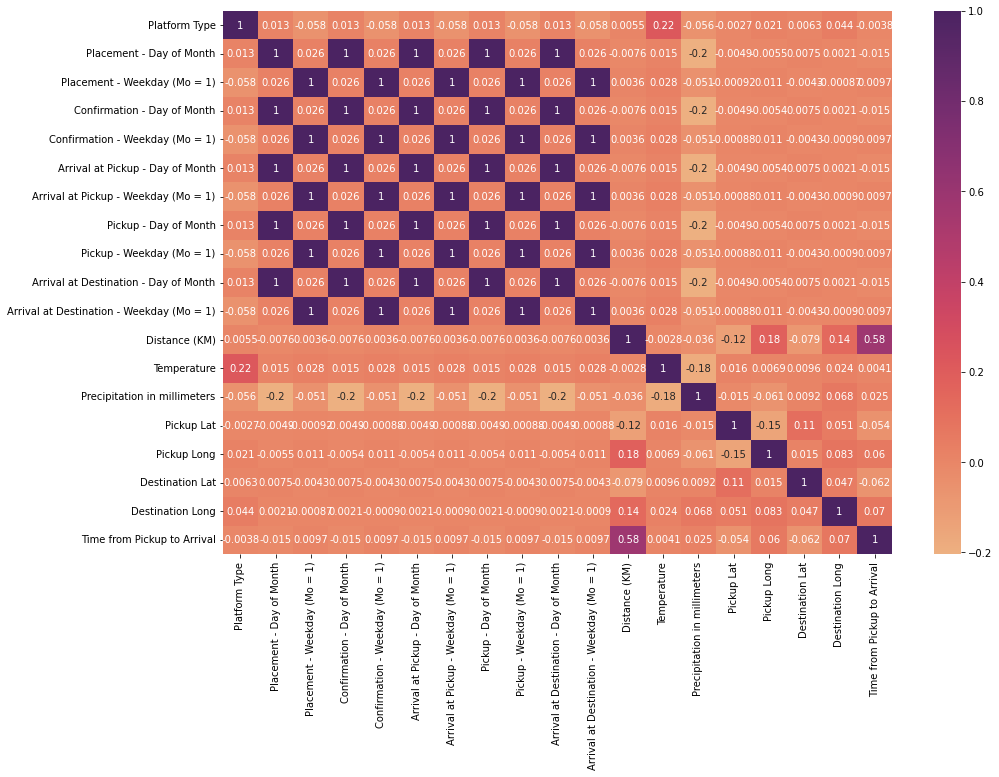

In [54]:
plt.figure(figsize=(15,10))

sns.heatmap(logistics_data.corr(), cmap ="flare", annot = True)

From the heatmap above, we can see that the majority features do not really correlate with precipitation in millimeters feature. We can make use of the last threefeatures(Destination Lat, Destination Long, Temperature, Time from Picckup to arrival as they show little correlations).

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

to_train = ['Precipitation in millimeters','Destination Lat', 'Destination Long','Time from Pickup to Arrival']

temp_df = logistics_data[to_train]

# Step-1 : Split the dataset that contains the missing values and no missing values as test and train respectively.

x_train = temp_df[temp_df['Precipitation in millimeters'].notnull()].drop(columns = 'Precipitation in millimeters')

y_train = temp_df[temp_df['Precipitation in millimeters'].notnull()]['Precipitation in millimeters']

x_test = temp_df[temp_df['Precipitation in millimeters'].isnull()].drop(columns = 'Precipitation in millimeters')

lr.fit(x_train, y_train)

pred = lr.predict(x_test)

print(np.round(pred,4))

[8.0306 8.1861 7.8614 ... 8.4616 7.4503 8.6072]


In [62]:
logistics_data['Precipitation in millimeters'].describe()

count    552.000000
mean       7.905797
std       17.089971
min        0.100000
25%        1.075000
50%        2.900000
75%        4.900000
max       99.100000
Name: Precipitation in millimeters, dtype: float64

In [63]:
# Impute NULL values with the predicted outcome

logistics_data['Precipitation in millimeters'][logistics_data['Precipitation in millimeters'].isnull()] = pred

In [66]:
logistics_data['Precipitation in millimeters'].sample(100)

18920    7.963834
6656     7.468459
5766     0.700000
993      6.565817
7496     8.837083
           ...   
4        7.725474
2859     6.023407
9287     7.372947
15203    8.167059
585      0.200000
Name: Precipitation in millimeters, Length: 100, dtype: float64

In [65]:
logistics_data.isna().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

We import and use a simple linear regression model, then we saved the most correlated values to precipitation in millimeters as observed from the heatmap. 

Then, we split the data to x_train , y_train (Training datasets) and x_test. 
The training datasets consists of no missing values and the test dataset contains the missing values we want to predict. Finally we fit the model, make predictions on the test dataset and use the predictions to fill the missing values.

#### To Handle Categorical Features

Categorical Features are features that can take values froma limited set of values. 

Eg: temp class: (hot, hotter, hottest) or star rating for an app (1,2,3,4,5)

Machine Learning Models cannot work with categorical features the way they are. These features are converted to numerical form before they can be used in ML model building.

The processs of converting categorical values to numerical is called __Encoding__.

__ Types of Categorical Features__

1. Ordinal Categorical Features : Features that have a  natural ordinal category, where one class is higher than other. 
Eg: Star Ratings, [1,2,3,4,5]

2. Non-Ordinal Categorical Features : Features that have no order, no class is higher than the other.

In [67]:
loan_demo.level_of_education_clients.unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [70]:
# Uisng Simple Map Function 

map_education = {'Primary':1,'Secondary':2, 'Graduate':3, 'Post-Graduate':4}

loan_demo['level_of_education_clients'] = loan_demo['level_of_education_clients'].map(map_education)

In [71]:
loan_demo['level_of_education_clients'].value_counts()

3.0    420
2.0     89
4.0     68
1.0     10
Name: level_of_education_clients, dtype: int64

In [77]:
# Category Encoders
# Check the Number of Unique Classes In Loan dataset

cat_col = loan_demo.select_dtypes(include='object').columns
for col in cat_col:
    print("Number of Classes in {}".format(col))
    print(loan_demo[col].nunique())
    print("---------------------------------------")

Number of Classes in customerid
4334
---------------------------------------
Number of Classes in birthdate
3297
---------------------------------------
Number of Classes in bank_account_type
3
---------------------------------------
Number of Classes in bank_name_clients
18
---------------------------------------
Number of Classes in bank_branch_clients
45
---------------------------------------
Number of Classes in employment_status_clients
6
---------------------------------------


The Ordinal Encoder function in the categorical encoders 

In [79]:
# Category Encoders
import category_encoders as cs

In [80]:
# Category Encoders
# Check the Number of Unique Classes In Loan dataset

cat_col = loan_demo.select_dtypes(include='object').columns
for col in cat_col:
    print("Number of Classes in {}".format(col))
    print(loan_demo[col].nunique())
    print("---------------------------------------")

Number of Classes in customerid
4334
---------------------------------------
Number of Classes in birthdate
3297
---------------------------------------
Number of Classes in bank_account_type
3
---------------------------------------
Number of Classes in bank_name_clients
18
---------------------------------------
Number of Classes in bank_branch_clients
45
---------------------------------------
Number of Classes in employment_status_clients
6
---------------------------------------


In [84]:
# Label Encoding

from base64 import encode


cat_col = ['bank_name_clients', 'bank_branch_clients']

encoder = cs.OrdinalEncoder(cols = cat_col)
loan_demo1 = encoder.fit_transform(loan_demo)

In [86]:
loan_demo1.sample(5).T

,1490,3214,2462,2602,3421
customerid,8a858e6f5668e01701568392953a495d,8a858fbf5b3a0b46015b3b03ff5567df,8a8589d7548fb3a8015494fcc5c34ab3,8a858f0d5a859ac0015a88c53e791cad,8a8589595384a8530153977b118e725e
birthdate,1988-10-18 00:00:00.000000,1986-04-07 00:00:00.000000,1987-02-14 00:00:00.000000,1980-12-10 00:00:00.000000,1985-04-25 00:00:00.000000
bank_account_type,Other,Savings,Savings,Savings,Savings
longitude_gps,8.113206,3.26045,3.951412,6.692801,3.420568
latitude_gps,6.324524,6.689699,7.414333,7.808566,6.442761
bank_name_clients,8,11,11,11,9
bank_branch_clients,1,1,1,1,1
employment_status_clients,Student,Permanent,Permanent,Permanent,Permanent
level_of_education_clients,NaN,NaN,NaN,NaN,NaN


First, we saved the categorical columns we want to encode in a list. 

Next, we create teh encoder objects and then we fit transform on the dataset.

#### __One-Hard Encoding__

The One-Hot Encoding uses binary values to represent the classes. The one-hot encoder craetes a feature per category and also creates number of features as the number of classes in the categorical features increases.

In [69]:
loan_demo.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [92]:
loan_demo[['bank_account_type', 'level_of_education_clients']].sample(17)

,bank_account_type,level_of_education_clients
82,Savings,NaN
280,Savings,NaN
2408,Savings,NaN
3057,Savings,NaN
3867,Savings,NaN
1752,Savings,NaN
1282,Savings,NaN
4137,Savings,NaN
698,Savings,NaN
1786,Savings,2.0


In [98]:
cat_columns = ['bank_account_type', 'level_of_education_clients']

one_not_enc = cs.OneHotEncoder(cols = cat_columns)

loan_demo2 = one_not_enc.fit_transform(loan_demo)

In [99]:
loan_demo2.sample(17).T

,3683,2347,3166,905,291,2448,4307,2263,1266,3814,1155,3812,2991,1562,71,1956,2861
customerid,8a858fd35b3ec939015b3ee758bd2cca,8a858e445cd56553015cd94108ba7dc1,8a858e935b496584015b49b68b7a2343,8a858fd05bfd7d3c015c01a7e0f636db,8a858e365c16bcef015c16d0f1a50a32,8a858e6c5c88d145015c97f3ff1724b0,8a858fa154e2912f01550b96c0520352,8a858f0e5a6171ba015a664da9bd5b28,8a858ecc596e3666015977c3100a7b84,8a858f7b5ca7abe3015ca859c9f62413,8a858fc75cd62882015ce3990b726a9b,8a858f555cc65d60015cc87c7641417a,8a858f30551130db0155267824a054c9,8a858ff85bd93919015bdf39c4bc513a,8a8588bd5369b66d01536e7b60501609,8a858f085b494826015b4995aaf8215d,8a858f1d5c7db9e2015c7dbe8a2d0254
birthdate,1992-05-12 00:00:00.000000,1969-02-09 00:00:00.000000,1994-05-13 00:00:00.000000,1975-11-25 00:00:00.000000,1981-11-10 00:00:00.000000,1986-01-14 00:00:00.000000,1980-03-14 00:00:00.000000,1982-07-07 00:00:00.000000,1981-04-18 00:00:00.000000,1976-08-14 00:00:00.000000,1983-06-19 00:00:00.000000,1989-07-07 00:00:00.000000,1972-05-18 00:00:00.000000,1989-12-11 00:00:00.000000,1979-06-04 00:00:00.000000,1984-10-12 00:00:00.000000,1978-04-25 00:00:00.000000
bank_account_type_1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1
bank_account_type_2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
bank_account_type_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
longitude_gps,4.56132,-0.120509,3.33605,3.353848,3.875492,3.871734,3.356682,7.265117,3.192362,3.823331,3.358228,5.838407,4.22869,3.284614,3.474824,6.923035,6.701124
latitude_gps,8.484654,5.803865,6.588435,6.654669,7.374784,7.357464,6.483432,9.11445,6.832171,7.375766,6.617449,5.5684,8.122393,6.622782,6.434396,4.869785,6.214584
bank_name_clients,GT Bank,EcoBank,Access Bank,GT Bank,GT Bank,GT Bank,First Bank,Zenith Bank,First Bank,First Bank,Access Bank,GT Bank,GT Bank,First Bank,Zenith Bank,GT Bank,Zenith Bank
bank_branch_clients,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_status_clients,Permanent,Permanent,Student,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent,Permanent


#### Handling Numerical/Continuous Features

Numerical / Continuous Features are the most common type of features ina ny dataset. They can take values froma range. 

For Example: The price of a product, Temperature of a place, Coordinates of a place on a map. 

These requires standardized information before applying it to ML algorithms.

 __Log Transformation__ : 
 
 Helps to center or normally distribute data( in statistical terms) so that ML models will perform better.

It works better with skewed features. Features can either be left or right skewed.

Skewness can be easily checked by visulaization.



In [100]:
logistics_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

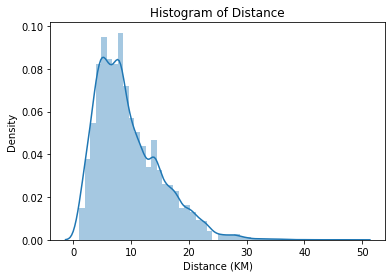

In [101]:
sns.distplot(logistics_data['Distance (KM)'])
plt.title("Histogram of Distance")
plt.show()

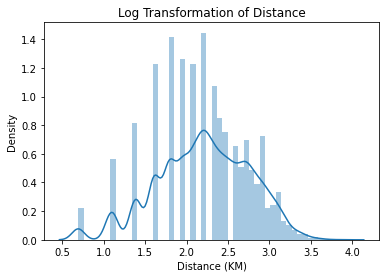

In [102]:
logistics_data['Distance (KM)'] = np.log1p(logistics_data['Distance (KM)'])

sns.distplot(logistics_data['Distance (KM)'])
plt.title("Log Transformation of Distance")
plt.show()


It has been changed to a normal distribution. 

#### Create New Features

In [103]:
prev_loans.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [105]:
prev_loans.columns


Index(['Unnamed: 0', 'customerid', 'systemloanid', 'loannumber',
       'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays',
       'closeddate', 'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [107]:
prev_loans["interest_on_remain"] = prev_loans['totaldue'] - prev_loans['loanamount']

In [108]:
prev_loans["interest_on_remain"].head()

0    3000.0
1    3000.0
2    3800.0
3    1500.0
4    1500.0
Name: interest_on_remain, dtype: float64

In [116]:
# Loans Collected By a Customer

loan_number_count = prev_loans.groupby(by = 'customerid').agg(['count'])[['loannumber']].reset_index()

#Merge back to dataset on customerID

prev_loans = prev_loans.merge(right = loan_number_count, how ="left", on = "customerid")

In [119]:
prev_loans.sample(3).T

,10908,309,7297
Unnamed: 0,10908,309,7297
customerid,8a85884e54be33290154c7d802b73042,8a858e045b495c30015b4f8417aa61c4,8a858e6d5b252065015b2acdc061657c
systemloanid,301853156,301927937,301899638
loannumber,12,2,2
approveddate,2017-04-03 14:56:18.000000,2017-06-05 17:01:37.000000,2017-05-10 16:27:25.000000
creationdate,2017-04-03 13:56:06.000000,2017-06-05 16:01:30.000000,2017-05-10 15:27:12.000000
loanamount,30000.0,10000.0,10000.0
totaldue,34100.0,13000.0,11500.0
termdays,30,30,15
closeddate,2017-05-03 11:57:29.000000,2017-07-01 09:03:56.000000,2017-05-26 21:28:39.000000


In [118]:
prev_loans.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,interest_on_remain,"(loannumber, count)"
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,3000.0,11
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,3000.0,11
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,3800.0,11
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1500.0,6
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1500.0,2


In [114]:
loan_number_count

,customerid,loannumber
,,count
0,8a1088a0484472eb01484669e3ce4e0b,1
1,8a1a1e7e4f707f8b014f797718316cad,4
2,8a1a32fc49b632520149c3b8fdf85139,7
3,8a1eb5ba49a682300149c3c068b806c7,8
4,8a1edbf14734127f0147356fdb1b1eb2,2
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,6
4355,8a858fff5a36fe68015a37f8550a02a2,6
4356,8a858fff5a36fe68015a3ac5851618ab,1


In [121]:
logistics_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

From the columns Distance (KM) and Time from Pickup to Arrival, we can find the speed

In [122]:
# Calculate the Speed

logistics_data['speed'] = logistics_data['Distance (KM)'] / logistics_data['Time from Pickup to Arrival']

logistics_data['speed'].head()

0    0.002160
1    0.001422
2    0.003047
3    0.001717
4    0.001897
Name: speed, dtype: float64

#### Normalization of the Features

Normalization helps in changing the values of numerical features to a common scale,  without distorting differences in the range of values or losing information.

Some Normalization functions available in SKlearn:

1. __Standard Scaler__ : Standard Scaler uses mean and standard deviation.
2. __MinMax Scaler__ : Normalize features by scaling each feature to a specified range of features.



In [128]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

prev_loans.columns


Index([           'Unnamed: 0',            'customerid',
                'systemloanid',            'loannumber',
                'approveddate',          'creationdate',
                  'loanamount',              'totaldue',
                    'termdays',            'closeddate',
                  'referredby',          'firstduedate',
             'firstrepaiddate',    'interest_on_remain',
       ('loannumber', 'count')],
      dtype='object')

In [126]:
col_list =['loanamount','totaldue','termdays']
sc = StandardScaler()
sc_data = sc.fit_transform(prev_loans[col_list])

In [127]:
sc_data

array([[-0.69825126, -0.62877649,  0.30213166],
       [-0.69825126, -0.62877649,  0.30213166],
       [ 0.37775723,  0.40432506,  0.30213166],
       ...,
       [-0.69825126, -0.62877649,  0.30213166],
       [-0.69825126, -0.62877649,  0.30213166],
       [-0.69825126, -0.62877649,  0.30213166]])

In [129]:
col_list =['loanamount','totaldue','termdays']
minsc = MinMaxScaler(feature_range=(0,1))
min_max_data = minsc.fit_transform(prev_loans[col_list])

In [130]:
min_max_data

array([[0.14893617, 0.14771848, 0.2       ],
       [0.14893617, 0.14771848, 0.2       ],
       [0.36170213, 0.31477185, 0.2       ],
       ...,
       [0.14893617, 0.14771848, 0.2       ],
       [0.14893617, 0.14771848, 0.2       ],
       [0.14893617, 0.14771848, 0.2       ]])

#### Working with Date Time Features

Date-Time Features are common types of features in Numerical datasets. These features require specific feature extraction techniques. 

1. Extract Date Components: like day of week, day of year, hours, minutes etc.
2. Extract time features like evening, moon, night etc.
3. Extract seasonal features like rainy season, winter, summer etc.
4. Place specific features liek national holidays, religious breaks, festival periods etc.
5. Calculate time elapsed between two related data features.

In [132]:
loan_perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [134]:
loan_perf['approveddate'].describe()

count                           4368
unique                          4362
top       2017-07-24 15:06:11.000000
freq                               2
Name: approveddate, dtype: object

In [143]:
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])

loan_perf['creationdate'] = pd.to_datetime(loan_perf['creationdate'])

In [144]:
loan_perf['creationdate'].describe()

count                    4368
unique                   4364
top       2017-07-05 13:28:44
freq                        2
first     2017-07-01 00:35:20
last      2017-07-30 21:55:43
Name: creationdate, dtype: object

In [145]:
loan_perf['approveddate'].describe()

count                    4368
unique                   4362
top       2017-07-24 15:06:11
freq                        2
first     2017-07-01 01:35:26
last      2017-07-30 22:55:51
Name: approveddate, dtype: object

In [147]:
loan_perf['date_elapsed_in_sec'] = (loan_perf['approveddate'] - loan_perf['creationdate']) / np.timedelta64(1, 's')

loan_perf['date_elapsed_in_sec']

0       3609.0
1       3623.0
2       3606.0
3       3606.0
4       3606.0
         ...  
4363    3672.0
4364    3607.0
4365    3670.0
4366    3606.0
4367    3605.0
Name: date_elapsed_in_sec, Length: 4368, dtype: float64

In [152]:
loan_perf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_sec
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,3623.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,3606.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,3606.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,3606.0
...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,3672.0
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,3607.0
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,3670.0
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,3606.0


In [153]:
# Create more data features

loan_perf['approved_day'] = loan_perf['approveddate'].dt.day
loan_perf['approved_week'] = loan_perf['approveddate'].dt.week
loan_perf['approved_year'] = loan_perf['approveddate'].dt.year

loan_perf['approved_hour'] = loan_perf['approveddate'].dt.hour

In [155]:
#Find out period of day (Evening, Morning ...)

def map_hour(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'Morning'
    elif x in [13,14,15,16]:
        return "Evening"
    else:
        return "Afternoon"

loan_perf['period_of_day'] = loan_perf['approved_hour'].map(map_hour)

In [156]:
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_sec,approved_day,approved_week,approved_year,approved_hour,period_of_day
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,3609.0,25,30,2017,8,Morning
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,3623.0,5,27,2017,17,Afternoon
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,3606.0,6,27,2017,14,Evening
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,3606.0,27,30,2017,19,Afternoon
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,3606.0,3,27,2017,23,Afternoon


#### Working With Latitude and Longitude

Geo-based features are also common in datasets. These faetures contains records about geographical locations of a place or a point. 

Features like latitude and longitude that are geo-features.

In [166]:
#Logistic data

logistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [160]:
logistics_data[['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']].head()

,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,-1.317755,36.830370,-1.300406,36.829741
1,-1.351453,36.899315,-1.295004,36.814358
2,-1.308284,36.843419,-1.300921,36.828195
3,-1.281301,36.832396,-1.257147,36.795063
4,-1.266597,36.792118,-1.295041,36.809817


In [170]:
logistics_data[['Pickup Lat', 'Pickup Long', 'Destination Lat','Destination Long']] = logistics_data[['Pickup Lat', 'Pickup Long', 'Destination Lat','Destination Long' ]].astype(float)

In [172]:
from math import cos, asin, sqrt, pi, radians


In [178]:
from math import cos, asin, sqrt, pi, radians, sin

def distance(lat1, long1, lat2, long2):
   
    lat1, lat2, long1, long2 = map(np.radians, (lat1, lat2, long1, long2))
    avg_radius_earth = 6371 #In km
    lat = lat2 - lat1
    long = long2 - long1
    dist = np.sin(lat * 0.5) **2 + np.cos(lat1) * np.cos(lat2) * np.sin(long * 0.5) ** 2
    distance1 = 2 *np.arcsin(np.sqrt(dist)) * avg_radius_earth

    return distance1


logistics_data['distance_covered'] = distance(logistics_data['Pickup Lat'], logistics_data['Pickup Long'], logistics_data['Destination Lat'], logistics_data['Destination Long'])


In [189]:
logistics_data[['distance_covered','Pickup Lat', 'Pickup Long', 'Destination Lat','Destination Long',]].head()


,distance_covered,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,1.930333,-1.317755,36.830370,-1.300406,36.829741
1,11.339849,-1.351453,36.899315,-1.295004,36.814358
2,1.880079,-1.308284,36.843419,-1.300921,36.828195
3,4.943458,-1.281301,36.832396,-1.257147,36.795063
4,3.724829,-1.266597,36.792118,-1.295041,36.809817


In [183]:
# Distance d = 3693 * arccos[(sin(lat1) * sin(lat2)) + cos (lat1) * cos(lat2) * cos(long2 - long1)]

### Conclusion

In this Guide, We have learnt about some of techniques and tools for performing feature engineering. We started by defining the feature engineering, then looked at some ways to handle missing values. Then, we showed some encoding techniques for handling categorical features and also various ways to handle numerical or continuous features where we specifically talked about Log Transformation,Normalization. Also we have created new features. 

Next we worked with Date-Time features and finally, how to handle geo features like latitude and longitude. 

__So Feature Engineering is really important and it defines how a Machine Model can become a good ML model__



Thanking You

#### __Dilnaz N__

